# <span style="color:teal">RBFE Network - Analysis</span>


In [1]:
# import libraries
import BioSimSpace as BSS
import os
import glob
import csv
import numpy as np
import math
import pandas as pd
import networkx as nx
import yaml
from scipy.stats import sem as sem
from scipy.stats import bootstrap
from sklearn.metrics import mean_absolute_error as mae
import pickle
import tempfile
import itertools
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd 
from rdkit import Chem

import sys

if '/home/anna/Documents/cinnabar' not in sys.path:
    sys.path.insert(1, '/home/anna/Documents/cinnabar')
import cinnabar

print(cinnabar.__file__)

try:
    import pipeline
except:
    print("adding code to the pythonpath...")
    code = '/home/anna/Documents/code/python'
    if code not in sys.path:
        sys.path.insert(1, code)
    import pipeline

from pipeline import *
from pipeline.utils import validate
from pipeline.analysis import *

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest 


Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.

/home/anna/Documents/cinnabar/cinnabar/__init__.py
adding code to the pythonpath...


In [2]:
# folders
protein = "tyk2"
file_ext = "MBAR_alchemlyb_benchmark" # for results files

# define all the folder locations
bench_folder = f"/home/anna/Documents/benchmark"
main_folder = f"{bench_folder}/{protein}_benchmark"
out_folder = f"{main_folder}/outputs"
res_folder = f"../test/results"
temp_folder = f"{main_folder}/outputs/results/temp"
exp_folder = f"{bench_folder}/inputs/experimental"

# make folders that may not exist
folder_list = [res_folder, temp_folder]
for fold in folder_list:
    validate.folder_path(fold, create=True)

# files
net_file = f"{main_folder}/execution_model/network_lomap.dat"
exp_file = f"{exp_folder}/{protein}.yml"
exp_file_dat = f"{res_folder}/exp_data_{protein}.dat"

# OUTPUT
file_ext_out = "test" # for how files will be written

# files that will get written
comp_pert_file_name = f"computed_perturbations_average_{file_ext_out}"
cinnabar_file = f"cinnabar_format_{file_ext_out}"
# TODO add file names for saving graphs

In [10]:
net_file = f"{main_folder}/execution_model/network_rbfenn.dat"
res_dir = "/home/anna/Documents/benchmark/tyk2_benchmark/outputs"
res_obj = analysis_engines(res_dir, net_file=net_file, exp_file=exp_file)
res_obj.compute()
# res_obj.calc_val_dict
# res_obj._results_repeat_files["SOMD"]

no results output folder provided, writing all output to the 'results_directory'.
lig_ejm46~lig_ejm43 or lig_ejm43~lig_ejm46 does not exist in the results for ['lig_ejm46~lig_ejm43', 'lig_ejm43~lig_ejm42', 'lig_ejm42~lig_ejm46']. This cycle is not included.
lig_jmc27~lig_jmc28 or lig_jmc28~lig_jmc27 does not exist in the results for ['lig_jmc27~lig_jmc28', 'lig_jmc28~lig_jmc23', 'lig_jmc23~lig_jmc27']. This cycle is not included.
lig_jmc27~lig_jmc30 or lig_jmc30~lig_jmc27 does not exist in the results for ['lig_jmc27~lig_jmc30', 'lig_jmc30~lig_jmc23', 'lig_jmc23~lig_jmc27']. This cycle is not included.
lig_ejm55~lig_ejm44 or lig_ejm44~lig_ejm55 does not exist in the results for ['lig_ejm55~lig_ejm44', 'lig_ejm44~lig_ejm42', 'lig_ejm42~lig_ejm55']. This cycle is not included.
lig_ejm49~lig_ejm44 or lig_ejm44~lig_ejm49 does not exist in the results for ['lig_ejm31~lig_ejm49', 'lig_ejm49~lig_ejm44', 'lig_ejm44~lig_ejm31']. This cycle is not included.
lig_ejm54~lig_ejm44 or lig_ejm44~lig_e

In [11]:
res_obj.graph_dir

'/home/anna/Documents/benchmark/tyk2_benchmark/outputs/graphs'

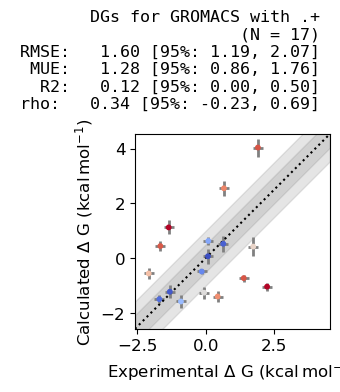

In [14]:
res_obj.plot_scatter_lig(engine="GROMACS", use_cinnabar=True)

In [8]:
plot_obj = plotting_engines(res_obj)
plot_obj.results_folder

'/home/anna/Documents/benchmark/tyk2_benchmark/outputs/graphs'

In [4]:
# print(res_obj.cinnabar_calc_val_dict["SOMD"]) # from cinnabar
print(res_obj.calc_pert_dict["SOMD"]["lig_ejm31~lig_ejm45"]) # doesnt work
# print(res_obj.normalised_exper_val_dict["SOMD"])
# print(res_obj.exper_pert_dict["lig_ejm31~lig_ejm45"])
print(res_obj.cinnabar_calc_pert_dict["SOMD"]["lig_ejm31~lig_ejm45"]) # from cinnabar network edges
res_obj.cinnabar_calc_val_dict["SOMD"] # from cinnabar network edges, is okay

# # solo dicts for exper
# res_obj.exper_val_dict = None # yml converted into experimental values, actual, for ligands in object
# res_obj.exper_pert_dict = None # yml converted into experimental values, actual, for perturbations in object

# # storing the nx digraphs, per engine
# res_obj._cinnabar_networks = {}

(0.17266579509499938, 0.2618797468448958)
(-0.14018090586209375, 0.20051809052021388)


{'lig_ejm54': (-1.0171083723177494, 0.10752048964540087),
 'lig_ejm55': (0.6140945474819395, 0.08586842060562244),
 'lig_ejm42': (0.6976619762167441, 0.05243054331504629),
 'lig_ejm47': (-0.6269115526834383, 0.060589793265773004),
 'lig_ejm50': (0.4201285990273164, 0.05519940110386187),
 'lig_ejm31': (0.3783714681710978, 0.03996580429408346),
 'lig_ejm49': (0.3388738321323758, 0.17185284913690832),
 'lig_ejm43': (0.17166464173104592, 0.07316896741667954),
 'lig_ejm44': (1.9742511717406739, 0.09641101356745947),
 'lig_jmc27': (-2.0640098247449243, 0.06580989198177732),
 'lig_jmc28': (-1.3637701266241826, 0.061176710580967485),
 'lig_jmc23': (-0.9577389007194358, 0.062363563255751625),
 'lig_ejm48': (1.5165344334743909, 0.09313290690841744),
 'lig_ejm53': (2.388547015498711, 0.10301560226374629),
 'lig_ejm46': (-1.0276017070606225, 0.056464349471104715),
 'lig_ejm45': (0.31279580700437987, 0.15488764155372972),
 'lig_jmc30': (-1.7557830083282968, 0.07929829121563765)}

In [12]:
# import networkanalysis
# import experiments
# import stats

# exp_dicts = res_obj._get_exp_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/')
# for key in exp_dicts[0]:
#     print(f"{key} : {exp_dicts[0][key][0]}, {exp_dicts[0][key][1]}")

free_fwf_dict = res_obj._get_ana_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/', engine="SOMD")
for key in free_fwf_dict:
    print(f"{key} : {free_fwf_dict[key][0]}, {free_fwf_dict[key][1]}")

# fwf_stats = res_obj._get_stats_fwf(fwf_path='/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis/', engine="SOMD")


Added additional data to 44 edges; added 0 new edges.
Added additional data to 43 edges; added 0 new edges.
lig_ejm31 : 0.4438846195538745, 0.13854767401247325
lig_ejm42 : 0.5315348593421803, 0.136042377815895
lig_ejm43 : 0.9263060947904159, 0.19536273747255428
lig_ejm44 : 1.6525224846333026, 0.18259368494136685
lig_ejm45 : 0.34699773961395514, 0.19454994704111592
lig_ejm46 : -0.6500995637874711, 0.18230303096192416
lig_ejm47 : -0.5060220552959447, 0.2534476999911248
lig_ejm48 : 0.28664870537773124, 0.2355547778560366
lig_ejm49 : -1.083365506415589, 0.24006534753654032
lig_ejm50 : -0.31127086389257824, 0.25510945671518576
lig_ejm53 : 2.1805905756579995, 0.2279846869039711
lig_ejm54 : -0.23068195127205976, 0.26475404315056167
lig_ejm55 : -1.0068513853492018, 0.20796847853458056
lig_jmc23 : -0.6686765737370772, 0.22966734279233156
lig_jmc27 : -0.5215525154146856, 0.26913448385509214
lig_jmc28 : -0.6270516072059147, 0.2671917969602374
lig_jmc30 : -0.762913056598937, 0.2621949273436029


In [ ]:
from cinnabar import wrangle,plotting
network = wrangle.FEMap(f"{res_folder}/{cinnabar_file}_{eng}.csv")

In [ ]:
for eng in engines:
    convert_cinnabar_file(values_dict[eng]["results_files"], values_dict["experimental"]["val_results"], f"{res_folder}/{cinnabar_file}_{eng}")

    network = wrangle.FEMap(f"{res_folder}/{cinnabar_file}_{eng}.csv")
    # plot the perturbations
    plotting.plot_DDGs(network.graph, filename=f"{res_folder}/DDGs_{file_ext_out}_{eng}.png", title=f"DDGs_{protein}_{file_ext_out}_{eng}")
    #plot the ligands
    plotting.plot_DGs(network.graph, filename=f"{res_folder}/DGs_{file_ext_out}_{eng}.png", title=f"DGs_{protein}_{file_ext_out}_{eng}")